# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

# Emosi

Emosi dasar manusia ada 6 yakni:
1. Marah
2. Jijik
3. Takut
4. Bahagia
5. Sedih
6. Terkejut

# Load Audio

In [3]:
audio = glob('../Audio Emotion/Audio/*/*.mp3')

In [23]:
y, sr = librosa.load(audio[8])

print(f'''nilai y = {y[0:5]}
y shape = {y.shape}
sample rate = {sr}''')

nilai y = [-0.00486109 -0.01039194 -0.01055774 -0.00951288 -0.00553302]
y shape = (102440,)
sample rate = 22050


## Audio Player

In [7]:
ipd.Audio(audio[0])

# Audio Dataframe

In [4]:
df = pd.DataFrame(columns=['file_name', 'amplitude', 'sample_rate'])
amplitude = []
sample_rate = []
file_name = []

In [4]:
for x in range(len(audio)):
    y, sr = librosa.load(audio[x])
    name = audio[x][23:]
    array = list(y)

    file_name += [name]*len(y)
    sample_rate += [sr]*len(y)
    amplitude += array



In [5]:
df['file_name'] = file_name
df['amplitude'] = amplitude
df['sample_rate'] = sample_rate

In [1]:
df.head(15)

NameError: name 'df' is not defined

In [13]:
# waktu dalam detik
len(y)/sr

1.4988208616780045

In [11]:
len(df)

916650

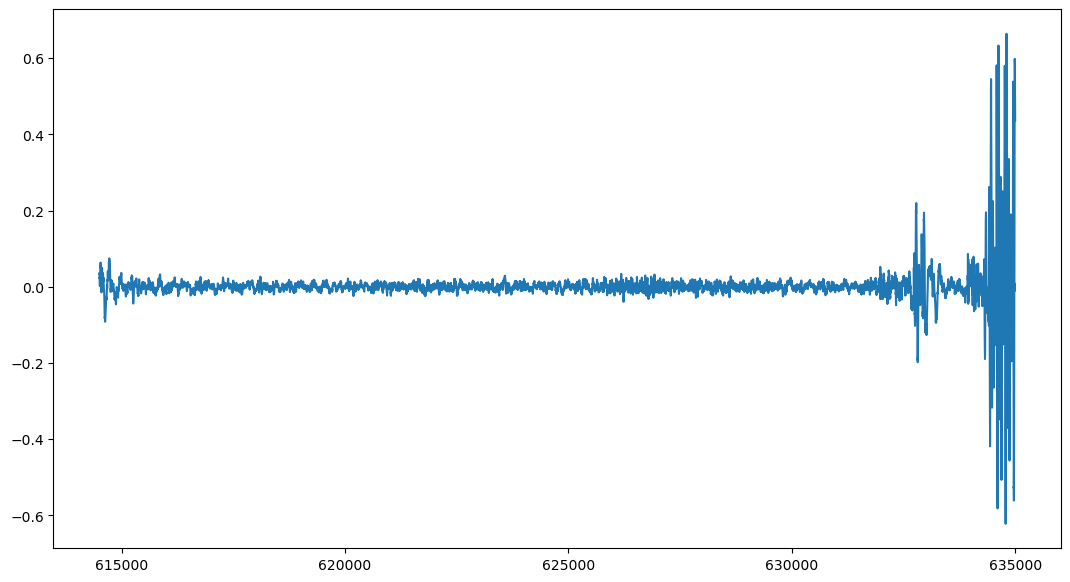

In [20]:
# ploting audio wave
figura = plt.figure(figsize=(13,7))
graph = figura.add_subplot()

graph.plot(range(614500,635000), df['amplitude'][614500:635000])
plt.show()